# A simple demonstration to predict on an image

In [1]:
import numpy as np
import mmcv
from mmcv.runner import load_checkpoint

from mmcls.models.builder import build_classifier
from mmcls.datasets.raf import FER_CLASSES
from mmcls.datasets.pipelines import Compose

In [2]:
cfg = mmcv.Config.fromfile("configs/apvit/RAF.py")
cfg.model.pretrained = None
cfg.model.extractor.pretrained = None
cfg.model.vit.pretrained = None

# build the model and load checkpoint
classifier = build_classifier(cfg.model)
load_checkpoint(classifier, "weights/APViT_RAF-3eeecf7d.pth", map_location='cpu')
classifier = classifier.to("cuda")
classifier.eval()

# define the preprocess for test
test_preprocess = Compose([
    dict(type='Resize', size=112),
    dict(type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375]),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='Collect', keys=['img',])
])


Unused kwargs: 
{'img_size': 112, 'patch_size': 16}
load checkpoint from local path: weights/APViT_RAF-3eeecf7d.pth


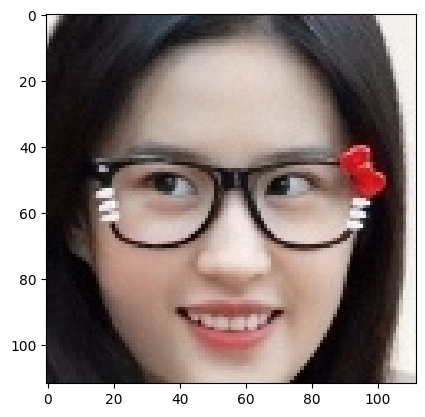

In [3]:
img = mmcv.imread('resources/demo.jpg')

import matplotlib.pyplot as plt
plt.imshow(img[:, :, ::-1])

In [4]:
# preprocess the image
data = test_preprocess(dict(img=img))
data['img'] = data['img'][None, ...].cuda()

# run the inference
out = classifier(**data, return_loss=False)
result_index = np.argmax(out[0])

print(f'Predict result: {FER_CLASSES[result_index]} with confidance: {out[0][result_index]:.2f}')

Predict result: Happiness with confidance: 1.00


## Alternatively, you can use high-level APIs from mmcls

In [5]:
from mmcls.apis.inference import init_model, inference_model

model = init_model(
    config='configs/apvit/RAF.py',
    checkpoint='weights/APViT_RAF-3eeecf7d.pth'
)

result = inference_model(model, img)
result

Unused kwargs: 
{'img_size': 112, 'patch_size': 16}
load checkpoint from local path: weights/APViT_RAF-3eeecf7d.pth


{'pred_label': 4, 'pred_score': 0.9999688863754272, 'pred_class': 'Happiness'}